m = 1050.1262102279825 +- 14.868807923854398
n = 47.944849337778116 +- 1.3126708384883128
Chi2       = 33.04662938260637
dof        = 22
Chi2_red   = 1.5021195173911985


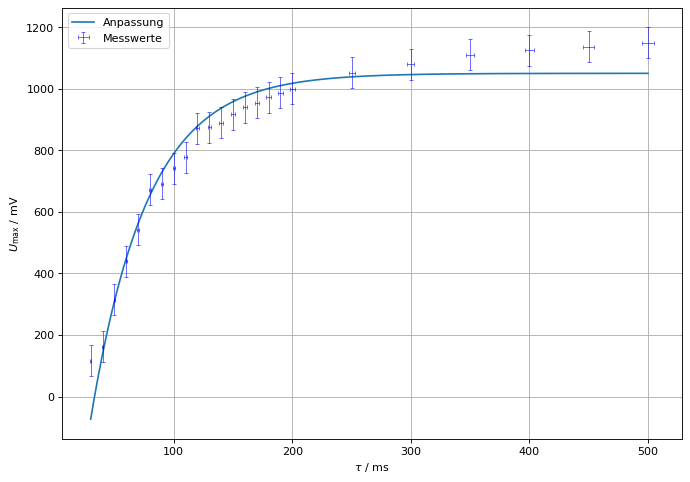

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.optimize import curve_fit

figure(figsize=(10,7), dpi=80)

umax = np.loadtxt('../data/polarisation.txt', skiprows=3, usecols=1)
tau = np.loadtxt('../data/polarisation.txt', skiprows=3, usecols=0)
dumax=[50]*len(umax)
dtau=0.01*tau

def f(x,m,n):
    return m*(1-2.0*np.exp(-x/n))

popt, pcov=curve_fit(f,tau,umax,
                     sigma=dumax,
                     absolute_sigma=True,
                     p0 = [np.max(umax), 60],
                     bounds = ([0, 0], [np.inf, np.inf]))
perr=np.sqrt(np.diag(pcov))
tau_fit = np.linspace(min(tau), max(tau), 1000)
plt.plot(tau_fit,f(tau_fit,*popt), label='Anpassung')


#print(chisquare(umax,f_exp=f(tum,*popt)))

print("m =", popt[0], "+-", perr[0])
print("n =", popt[1], "+-", perr[1])
#print('a =', popt[2], "+-", perr[2])
# compute chi-square
chi2 = np.sum(((umax - f(tau, *popt)) / dumax)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(tau) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)



plt.errorbar(tau,umax,xerr=dtau,yerr=dumax, ls='', capsize=2,elinewidth=0.5, capthick=0.5, color='blue',label='Messwerte')
#plt.plot(tum,umax)
plt.xlabel(r'$\tau$ / ms')
plt.ylabel(r'$U_{\mathrm{max}}$ / mV')
plt.grid(which='minor',linewidth=0.2)
plt.grid(which='major')
plt.legend(loc='upper left')
plt.savefig('../plots/polarisation.pdf')